In [110]:
import requests
import json
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [111]:
url = "https://api.datos.gob.mx/v2/profeco.precios"
response_json= requests.get(url).json()
print("Server Response: " + str(response_json))


Server Response: {'pagination': {'pageSize': 100, 'page': 1, 'total': 219584}, 'results': [{'_id': '571e4c002f232201006c6cac', 'producto': 'TORTILLA DE MAIZ', 'presentacion': '1 KG. GRANEL', 'marca': 'S/M', 'categoria': 'TORTILLAS Y DERIVADOS DEL MAIZ', 'catalogo': 'BASICOS', 'precio': '11.90', 'fechaRegistro': '2015-02-10 00:00:00.000', 'cadenaComercial': 'HIPERMERCADO SORIANA', 'giro': 'TIENDA DE AUTOSERVICIO', 'rfc': '', 'razonSocial': '', 'nombreComercial': 'SORIANA HIPER SUCURSAL CALAFIA', 'direccion': 'BLVD. ADOLFO LOPEZ MATEOS 1100, ESQ. CALAFIA, COL. ZONA INDUSTRIAL, CP. 21000', 'estado': 'BAJA CALIFORNIA', 'municipio': 'MEXICALI', 'latitud': '32.641719', 'longitud': '-115.469582'}, {'_id': '571e4c002f232201006c6cad', 'producto': 'TORTILLA DE MAIZ', 'presentacion': '1 KG. GRANEL', 'marca': 'S/M', 'categoria': 'TORTILLAS Y DERIVADOS DEL MAIZ', 'catalogo': 'BASICOS', 'precio': '9.50', 'fechaRegistro': '2015-02-10 00:00:00.000', 'cadenaComercial': 'WAL-MART', 'giro': 'TIENDA DE AU

In [112]:
total_size = response_json["pagination"]["total"]
print('Number of elements in Profeco Database: ' + str(total_size))


Number of elements in Profeco Database: 219584


In [113]:
page_number = round(total_size/1000)
page_size = 1000
url_param1 = '?pageSize='
url_param2 = '&page='
#https://api.datos.gob.mx/v2/profeco.precios?pageSize=1000&page=1
search_url = ''
json_list = []
for page in range(1,page_number + 1): #
    if page == page_number:
        search_url = url + url_param1 + str(total_size%1000) + url_param2 + str(page)
    else:
        search_url = url + url_param1 + str(page_size) + url_param2 + str(page)

    json_data = requests.get(search_url).json()
    json_list = json_list + json_data['results']
    #print('Page: ' + str(page))
    #print('No. Elements: ' + str(len(json_data['results'])))
    #print('Working...')

print(len(json_list))

219584


In [114]:
data_frame = pd.DataFrame(json_list)
data_frame = data_frame.drop(data_frame[data_frame['fechaRegistro'] == 'fechaRegistro'].index)
#data_frame['fechaRegistro'] = data_frame['fechaRegistro'].apply(lambda elem : datetime.strptime(str(elem).split(' ')[0],"%Y-%m-%d")) 
data_frame['fechaRegistro'] = pd.to_datetime(data_frame['fechaRegistro'], format='%Y-%m-%d')

data_frame.to_csv('Profeco_Catalog.csv', encoding='utf-8')
data_frame.dtypes

_id                        object
cadenaComercial            object
catalogo                   object
categoria                  object
direccion                  object
estado                     object
fechaRegistro      datetime64[ns]
giro                       object
latitud                    object
longitud                   object
marca                      object
municipio                  object
nombreComercial            object
precio                     object
presentacion               object
producto                   object
razonSocial                object
rfc                        object
dtype: object

In [115]:
data_frame.head(3)



,_id,cadenaComercial,catalogo,categoria,direccion,estado,fechaRegistro,giro,latitud,longitud,marca,municipio,nombreComercial,precio,presentacion,producto,razonSocial,rfc
0,571e4c002f232201006c6cac,HIPERMERCADO SORIANA,BASICOS,TORTILLAS Y DERIVADOS DEL MAIZ,"BLVD. ADOLFO LOPEZ MATEOS 1100, ESQ. CALAFIA, ...",BAJA CALIFORNIA,2015-02-10,TIENDA DE AUTOSERVICIO,32.641719,-115.469582,S/M,MEXICALI,SORIANA HIPER SUCURSAL CALAFIA,11.90,1 KG. GRANEL,TORTILLA DE MAIZ,,
1,571e4c002f232201006c6cad,WAL-MART,BASICOS,TORTILLAS Y DERIVADOS DEL MAIZ,"CTRA. TRANSPENISULAR ENSENADA-LA PAZ 3976, ENT...",BAJA CALIFORNIA,2015-02-10,TIENDA DE AUTOSERVICIO,31.859079,-116.606337,S/M,ENSENADA,WALMART SUCURSAL ENSENADA,9.50,1 KG. GRANEL,TORTILLA DE MAIZ,,
2,571e4c002f232201006c6cae,SUPER MERCADO ARAMBURO,BASICOS,TORTILLAS Y DERIVADOS DEL MAIZ,"FORJADORES DE SUDCALIFORNIA 2910, ENTRE ALAMO ...",BAJA CALIFORNIA SUR,2015-02-10,TIENDA DE AUTOSERVICIO,24.135925,-110.311974,S/M,LA PAZ,SUPER MERCADO ARAMBURO SUCURSAL FORJADORES,9.90,1 KG. GRANEL,TORTILLA DE MAIZ,,


In [116]:
RawData = pd.read_csv('Profeco_Catalog.csv')
RawData.head(3)

,Unnamed: 0,_id,cadenaComercial,catalogo,categoria,direccion,estado,fechaRegistro,giro,latitud,longitud,marca,municipio,nombreComercial,precio,presentacion,producto,razonSocial,rfc
0,0,571e4c002f232201006c6cac,HIPERMERCADO SORIANA,BASICOS,TORTILLAS Y DERIVADOS DEL MAIZ,"BLVD. ADOLFO LOPEZ MATEOS 1100, ESQ. CALAFIA, ...",BAJA CALIFORNIA,2015-02-10,TIENDA DE AUTOSERVICIO,32.641719,-115.469582,S/M,MEXICALI,SORIANA HIPER SUCURSAL CALAFIA,11.9,1 KG. GRANEL,TORTILLA DE MAIZ,NaN,NaN
1,1,571e4c002f232201006c6cad,WAL-MART,BASICOS,TORTILLAS Y DERIVADOS DEL MAIZ,"CTRA. TRANSPENISULAR ENSENADA-LA PAZ 3976, ENT...",BAJA CALIFORNIA,2015-02-10,TIENDA DE AUTOSERVICIO,31.859079,-116.606337,S/M,ENSENADA,WALMART SUCURSAL ENSENADA,9.5,1 KG. GRANEL,TORTILLA DE MAIZ,NaN,NaN
2,2,571e4c002f232201006c6cae,SUPER MERCADO ARAMBURO,BASICOS,TORTILLAS Y DERIVADOS DEL MAIZ,"FORJADORES DE SUDCALIFORNIA 2910, ENTRE ALAMO ...",BAJA CALIFORNIA SUR,2015-02-10,TIENDA DE AUTOSERVICIO,24.135925,-110.311974,S/M,LA PAZ,SUPER MERCADO ARAMBURO SUCURSAL FORJADORES,9.9,1 KG. GRANEL,TORTILLA DE MAIZ,NaN,NaN


In [117]:
Df2016 = RawData[(RawData['fechaRegistro'] == '2016-05-10')]
Df2016.head(3)

,Unnamed: 0,_id,cadenaComercial,catalogo,categoria,direccion,estado,fechaRegistro,giro,latitud,longitud,marca,municipio,nombreComercial,precio,presentacion,producto,razonSocial,rfc
155540,155540,5769b160d4c5840100089944,CHEDRAUI,BASICOS,CARNES FRIAS SECAS Y EMBUTIDOS,"BLVD. DOMINGO ARRIETA 601, ENTRE TERESA DE CAL...",DURANGO,2016-05-10,TIENDA DE AUTOSERVICIO,24.011236,-104.661718,S/M,DURANGO,CHEDRAHUI SUCURSAL DURANGO (125),49.90,PAQUETE 200 GR. TOCINO AHUMADO,PARMA. SABORI,NaN,NaN
155541,155541,5769b160d4c5840100089945,HIPERMERCADO SORIANA,BASICOS,CARNES FRIAS SECAS Y EMBUTIDOS,"COSTERA MIGUEL ALEMAN 240, ENTRE JUAN S. CANO ...",GUERRERO,2016-05-10,TIENDA DE AUTOSERVICIO,16.858598,-99.890270,S/M,ACAPULCO DE JUÁREZ,SORIANA HIPER SUCURSAL ACAPULCO COSTERA (274),47.25,PAQUETE 200 GR. TOCINO AHUMADO,PARMA. SABORI,NaN,NaN
155542,155542,5769b160d4c5840100089946,WAL-MART,BASICOS,CARNES FRIAS SECAS Y EMBUTIDOS,"MANUEL CAVAZOS L. 85, ENTRE PASEO DEL ARBOL Y ...",TAMAULIPAS,2016-05-10,TIENDA DE AUTOSERVICIO,25.858789,-97.519778,S/M,MATAMOROS,WALMART SUCURSAL MATAMOROS,49.00,PAQUETE 200 GR. TOCINO AHUMADO,PARMA. SABORI,NaN,NaN


In [118]:
Master = Df2016.drop(columns = ['giro','razonSocial','rfc','catalogo','Unnamed: 0','direccion','nombreComercial']).reset_index(drop=True).rename(index=str, columns={"_id": "ID", "cadenaComercial": "Cadena", "categoria": "Categoría", "estado": "Estado", "fechaRegistro": "Fecha", "latitud": "Latitud", "longitud": "Longitud", "marca": "Marca", "municipio": "Municipio", "precio": "Precio", "presentacion": "Presentación", "producto": "Producto"})
Master.head(3)

,ID,Cadena,Categoría,Estado,Fecha,Latitud,Longitud,Marca,Municipio,Precio,Presentación,Producto
0,5769b160d4c5840100089944,CHEDRAUI,CARNES FRIAS SECAS Y EMBUTIDOS,DURANGO,2016-05-10,24.011236,-104.661718,S/M,DURANGO,49.90,PAQUETE 200 GR. TOCINO AHUMADO,PARMA. SABORI
1,5769b160d4c5840100089945,HIPERMERCADO SORIANA,CARNES FRIAS SECAS Y EMBUTIDOS,GUERRERO,2016-05-10,16.858598,-99.890270,S/M,ACAPULCO DE JUÁREZ,47.25,PAQUETE 200 GR. TOCINO AHUMADO,PARMA. SABORI
2,5769b160d4c5840100089946,WAL-MART,CARNES FRIAS SECAS Y EMBUTIDOS,TAMAULIPAS,2016-05-10,25.858789,-97.519778,S/M,MATAMOROS,49.00,PAQUETE 200 GR. TOCINO AHUMADO,PARMA. SABORI


In [119]:
#Estados = Master["Estado"].nunique()
Estados = Master.drop_duplicates("Estado")
#Estados.head(100)
Estados = Estados["Estado"].tolist()
Estados

['DURANGO',
 'GUERRERO',
 'TAMAULIPAS',
 'MICHOACÁN DE OCAMPO',
 'AGUASCALIENTES',
 'BAJA CALIFORNIA',
 'BAJA CALIFORNIA SUR',
 'CHIAPAS',
 'CHIHUAHUA',
 'CAMPECHE',
 'SONORA',
 'QUINTANA ROO',
 'MORELOS',
 'COAHUILA DE ZARAGOZA']

# Master Data Frame

Table Ready to make analysis on any product, category, state, etc.

In [30]:
Master = Master.infer_objects()
#Master['Precio'] = Master.to_numeric(Master['Precio'], downcast='float')
#Master['Latitud'] = Master.to_numeric(Master['Latitud'], downcast='float')
#Master['Longitud'] = Master.to_numeric(Master['Longitud'], downcast='float')
Master.dropna()
Master.head(100)
#Master.dtypes


,ID,Cadena,Categoría,Estado,Fecha,Latitud,Longitud,Marca,Municipio,Precio,Presentación,Producto
0,5769b160d4c5840100089944,CHEDRAUI,CARNES FRIAS SECAS Y EMBUTIDOS,DURANGO,2016-05-10,24.011236,-104.661718,S/M,DURANGO,49.90,PAQUETE 200 GR. TOCINO AHUMADO,PARMA. SABORI
1,5769b160d4c5840100089945,HIPERMERCADO SORIANA,CARNES FRIAS SECAS Y EMBUTIDOS,GUERRERO,2016-05-10,16.858598,-99.890270,S/M,ACAPULCO DE JUÁREZ,47.25,PAQUETE 200 GR. TOCINO AHUMADO,PARMA. SABORI
2,5769b160d4c5840100089946,WAL-MART,CARNES FRIAS SECAS Y EMBUTIDOS,TAMAULIPAS,2016-05-10,25.858789,-97.519778,S/M,MATAMOROS,49.00,PAQUETE 200 GR. TOCINO AHUMADO,PARMA. SABORI
3,5769b160d4c5840100089947,HIPERMERCADO SORIANA,CARNES FRIAS SECAS Y EMBUTIDOS,MICHOACÁN DE OCAMPO,2016-05-10,19.382990,102.057932,S/M,URUAPAN,58.25,PAQUETE 200 GR. TOCINO AHUMADO,PARMA. SABORI
4,5769b160d4c5840100089948,HIPERMERCADO SORIANA,CARNES FRIAS SECAS Y EMBUTIDOS,AGUASCALIENTES,2016-05-10,21.895718,-102.310368,S/M,AGUASCALIENTES,46.90,PAQUETE 250 GR. TOCINO AHUMADO,KIR
5,5769b160d4c5840100089949,HIPERMERCADO SORIANA,CARNES FRIAS SECAS Y EMBUTIDOS,BAJA CALIFORNIA,2016-05-10,32.641719,-115.469582,S/M,MEXICALI,42.00,PAQUETE 250 GR. TOCINO AHUMADO,KIR
6,5769b160d4c584010008994a,WAL-MART,CARNES FRIAS SECAS Y EMBUTIDOS,BAJA CALIFORNIA,2016-05-10,31.859079,-116.606337,S/M,ENSENADA,50.00,PAQUETE 250 GR. TOCINO AHUMADO,KIR
7,5769b160d4c584010008994b,WAL-MART,CARNES FRIAS SECAS Y EMBUTIDOS,BAJA CALIFORNIA SUR,2016-05-10,22.890285,-109.916942,S/M,LOS CABOS,45.50,PAQUETE 250 GR. TOCINO AHUMADO,KIR
8,5769b160d4c584010008994c,HIPERMERCADO SORIANA,CARNES FRIAS SECAS Y EMBUTIDOS,DURANGO,2016-05-10,25.555028,-103.505483,S/M,GÓMEZ PALACIO,49.50,PAQUETE 250 GR. TOCINO AHUMADO,KIR
9,5769b160d4c584010008994d,BODEGA AURRERA,CARNES FRIAS SECAS Y EMBUTIDOS,CHIAPAS,2016-05-10,16.754378,-93.121102,S/M,TUXTLA GUTIÉRREZ,48.00,PAQUETE 250 GR. TOCINO AHUMADO,KIR


In [31]:
Master.dtypes

ID               object
Cadena           object
Categoría        object
Estado           object
Fecha            object
Latitud         float64
Longitud        float64
Marca            object
Municipio        object
Precio          float64
Presentación     object
Producto         object
dtype: object

## Egg Analysis
### This is the key part to do this analysis with any product
Analysis of Egg sales in each state

In [71]:
#PriceAv = Master["Precio"].mean()
#PriceAv = Master.groupby('Estado')['Precio'].mean()
#Master[Master['Producto']=='HUEVO'.groupby('Estado')['Precio'].mean()
Master.dropna()
#Master.head(500)

#Parte clave para hacer con cualquier producto

HuevoPrice = Master[Master.Producto == 'HUEVO']
HuevoPrice

,ID,Cadena,Categoría,Estado,Fecha,Latitud,Longitud,Marca,Municipio,Precio,Presentación,Producto
1412,5769b160d4c5840100089ec8,CHEDRAUI,HUEVO,CHIAPAS,2016-05-10,14.893675,-92.276015,TEHUACAN,TAPACHULA,21.00,PAQUETE CON 12 BLANCO,HUEVO
1413,5769b160d4c5840100089ec9,HIPERMERCADO SORIANA,HUEVO,AGUASCALIENTES,2016-05-10,21.895718,-102.310368,BACHOCO,AGUASCALIENTES,22.00,PAQUETE CON 12 ROJO,HUEVO
1414,5769b160d4c5840100089eca,WAL-MART,HUEVO,BAJA CALIFORNIA SUR,2016-05-10,22.890285,-109.916942,BACHOCO,LOS CABOS,25.90,PAQUETE CON 12 ROJO,HUEVO
1415,5769b160d4c5840100089ecb,HIPERMERCADO SORIANA,HUEVO,GUERRERO,2016-05-10,16.858598,-99.890270,BACHOCO,ACAPULCO DE JUÁREZ,22.00,PAQUETE CON 12 ROJO,HUEVO
1416,5769b160d4c5840100089ecc,EXTRA,HUEVO,GUERRERO,2016-05-10,16.851840,-99.900806,BACHOCO,ACAPULCO DE JUÁREZ,20.90,PAQUETE CON 12 ROJO,HUEVO
1417,5769b160d4c5840100089ecd,LEY (AUTOSERVICIO),HUEVO,SONORA,2016-05-10,31.322323,-109.550158,BACHOCO,AGUA PRIETA,24.50,PAQUETE CON 12 ROJO,HUEVO
1418,5769b160d4c5840100089ece,HIPERMERCADO SORIANA,HUEVO,MICHOACÁN DE OCAMPO,2016-05-10,19.382990,102.057932,BACHOCO,URUAPAN,23.75,PAQUETE CON 12 ROJO,HUEVO
1419,5769b160d4c5840100089ecf,CHEDRAUI,HUEVO,CHIAPAS,2016-05-10,14.893675,-92.276015,TEHUACAN,TAPACHULA,30.00,PAQUETE CON 18 BLANCO,HUEVO
1420,5769b160d4c5840100089ed0,HIPERMERCADO SORIANA,HUEVO,AGUASCALIENTES,2016-05-10,21.895718,-102.310368,BACHOCO,AGUASCALIENTES,33.00,PAQUETE CON 18 ROJO,HUEVO
1421,5769b160d4c5840100089ed1,WAL-MART,HUEVO,BAJA CALIFORNIA SUR,2016-05-10,22.890285,-109.916942,BACHOCO,LOS CABOS,38.50,PAQUETE CON 18 ROJO,HUEVO


In [125]:
HuevoAv = HuevoPrice.groupby('Estado')['Precio'].mean()
#SLat = [21.87945992,30.76405113,26.01333335,18.65365928,16.74999697,26.93335472,25.57005292,17.54997398,19.67997316,21.20839057,27.58000775,22.73335268]
HuevoAv = pd.DataFrame([HuevoAv]).transpose().reset_index()
HuevoAv

,Estado,Precio
0,AGUASCALIENTES,28.250000
1,BAJA CALIFORNIA,29.000000
2,BAJA CALIFORNIA SUR,30.133333
3,CAMPECHE,28.550000
4,CHIAPAS,26.000000
5,CHIHUAHUA,30.950000
6,DURANGO,25.137500
7,GUERRERO,27.956250
8,MICHOACÁN DE OCAMPO,28.625000
9,QUINTANA ROO,26.500000


In [126]:
#plt.bar(HuevoAv["Estado"],HuevoAv["Huevo"])
#plt.title("Precio promedio del huevo por Estado - 2016A")
#plt.ylabel("Precio Ps.$")
#plt.xlabel("Estado - México")
#plt.grid(True)

# Save the figure
#plt.savefig("LatTemp.png")

# Show plot
#plt.show()

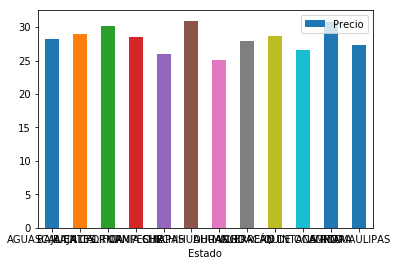

In [127]:
HuevoChart = HuevoAv.plot.bar(x='Estado', y='Precio', rot=0)

In [151]:
HuevoBrand = HuevoPrice.groupby('Marca')['Precio'].mean()
HuevoBrand =  pd.DataFrame([HuevoBrand]).transpose().reset_index()
HuevoBrand

,Marca,Precio
0,BACHOCO,28.57500
1,CRIO,26.50000
2,SAN JUAN,26.33125
3,TEHUACAN,25.50000


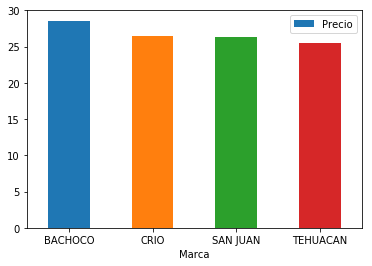

In [152]:
HuevoBrandChart = HuevoBrand.plot.bar(x='Marca', y='Precio', rot=0)

In [153]:
HuevoPresencia = HuevoPrice.groupby('Marca')['Estado'].nunique()
HuevoPresencia = pd.DataFrame([HuevoPresencia]).transpose().reset_index()
HuevoPresencia

,Marca,Estado
0,BACHOCO,10
1,CRIO,1
2,SAN JUAN,4
3,TEHUACAN,1


In [154]:
Tot_states = HuevoPrice['Estado'].nunique()
Tot_states 


12

In [157]:
#HuevoPresencia = Tot_states/HuevoPresencia['Estado'] - 1
#HuevoPresencia = pd.DataFrame([HuevoPresencia]).transpose().reset_index()

#HuevoPresencia

,index,Estado
0,0,0.333333
1,1,inf
2,2,3.000000
3,3,inf
